<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_modeling_forecasting/information_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Information Entropy

Information theory is a subfield of mathematics concerned with transmitting data across a noisy channel.

A cornerstone of information theory is the idea of quantifying how much information there is in a message. More generally, this can be used to quantify the information in an event and a random variable, called entropy, and is calculated using probability.

Calculating information and entropy is a useful tool in machine learning and is used as the basis for techniques such as feature selection, building decision trees, and, more generally, fitting classification models. As such, a machine learning practitioner requires a strong understanding and intuition for information and entropy.

In this Script: 

* Information theory is concerned with data compression and transmission and builds upon probability and supports machine learning.
* Information provides a way to quantify the amount of surprise for an event measured in bits.
* Entropy provides a measure of the average amount of information needed to represent an event drawn from a probability distribution for a random variable.

### Information Theory

[Information theory](https://en.wikipedia.org/wiki/Information_theory) is a field of study concerned with quantifying information for communication.

It is a subfield of mathematics and is concerned with topics like data compression and the limits of signal processing. The field was proposed and developed by Claude Shannon while working at the US telephone company Bell Labs.

A foundational concept from information is the quantification of the amount of information in things like events, random variables, and distributions.

Quantifying the amount of information requires the use of probabilities, hence the relationship of information theory to probability.

Measurements of information are widely used in artificial intelligence and machine learning, such as in the construction of decision trees and the optimization of classifier models.

As such, there is an important relationship between information theory and machine learning and a practitioner must be familiar with some of the basic concepts from the field.

### Calculate the Information for an Event

Quantifying information is the foundation of the field of information theory.

The intuition behind quantifying information is the idea of measuring how much surprise there is in an event. Those events that are rare (low probability) are more surprising and therefore have more information than those events that are common (high probability).

* Low Probability Event: High Information (surprising).
* High Probability Event: Low Information (unsurprising).

Rare events are more uncertain or more surprising and require more information to represent them than common events.

We can calculate the amount of information there is in an event using the probability of the event. This is called “Shannon information,” “self-information,” or simply the “information,” and can be calculated for a discrete event x as follows:

information(x) = -log( p(x) )
Where log() is the base-2 logarithm and p(x) is the probability of the event x.

The choice of the base-2 logarithm means that the units of the information measure is in bits (binary digits). This can be directly interpreted in the information processing sense as the number of bits required to represent the event.

The calculation of information is often written as h(); for example:

```h(x) = -log( p(x) )```

The negative sign ensures that the result is always positive or zero.

Information will be zero when the probability of an event is 1.0 or a certainty, e.g. there is no surprise.

Let’s make this concrete with some examples.

Consider a flip of a single fair coin. The probability of heads (and tails) is 0.5. We can calculate the information for flipping a head in Python using the log2() function.

```
# calculate the information for a coin flip
from math import log2
# probability of the event
p = 0.5
# calculate information for event
h = -log2(p)
# print the result
print('p(x)=%.3f, information: %.3f bits' % (p, h))
```

Running the example prints the probability of the event as 50% and the information content for the event as 1 bit.

``` p(x)=0.500, information: 1.000 bits ```

If the same coin was flipped n times, then the information for this sequence of flips would be n bits.

If the coin was not fair and the probability of a head was instead 10% (0.1), then the event would be more rare and would require more than 3 bits of information.

```p(x)=0.100, information: 3.322 bits```

We can also explore the information in a single roll of a fair six-sided dice, e.g. the information in rolling a 6.

We know the probability of rolling any number is 1/6, which is a smaller number than 1/2 for a coin flip, therefore we would expect more surprise or a larger amount of information.

```
# calculate the information for a dice roll
from math import log2
# probability of the event
p = 1.0 / 6.0
# calculate information for event
h = -log2(p)
# print the result
print('p(x)=%.3f, information: %.3f bits' % (p, h))
Running the example, we can see that our intuition is correct and that indeed, there is more than 2.5 bits of information in a single roll of a fair die.
```

```p(x)=0.167, information: 2.585 bits```

Other logarithms can be used instead of the base-2. For example, it is also common to use the natural logarithm that uses base-e (Euler’s number) in calculating the information, in which case the units are referred to as “nats.”

We can further develop the intuition that low probability events have more information.

To make this clear, we can calculate the information for probabilities between 0 and 1 and plot the corresponding information for each. We can then create a plot of probability vs information. We would expect the plot to curve downward from low probabilities with high information to high probabilities with low information.

The complete example is listed below.

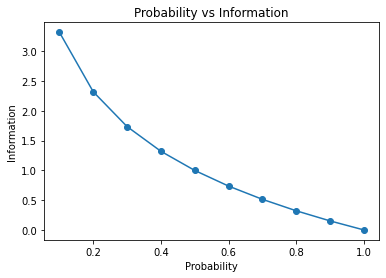

In [11]:
# compare probability vs information entropy
from math import log2
from matplotlib import pyplot
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
pyplot.plot(probs, info, marker='o')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information')
pyplot.show()

Running the example creates the plot of probability vs information in bits.

We can see the expected relationship where low probability events are more surprising and carry more information, and the complement of high probability events carry less information.

We can also see that this relationship is not linear, it is in-fact slightly sub-linear. This makes sense given the use of the log function.



### Calculate the Entropy for a Random Variable

We can also quantify how much information there is in a random variable.

For example, if we wanted to calculate the information for a random variable X with probability distribution p, this might be written as a function H(); for example:

```H(X)```

In effect, calculating the information for a random variable is the same as calculating the information for the probability distribution of the events for the random variable.

Calculating the information for a random variable is called “information entropy,” “Shannon entropy,” or simply “entropy“. It is related to the idea of entropy from physics by analogy, in that both are concerned with uncertainty.

The intuition for entropy is that it is the average number of bits required to represent or transmit an event drawn from the probability distribution for the random variable.

Entropy can be calculated for a random variable X with k in K discrete states as follows:

```H(X) = -sum(each k in K p(k) * log(p(k)))```

That is the negative of the sum of the probability of each event multiplied by the log of the probability of each event.

Like information, the log() function uses base-2 and the units are bits. A natural logarithm can be used instead and the units will be nats.

The lowest entropy is calculated for a random variable that has a single event with a probability of 1.0, a certainty. The largest entropy for a random variable will be if all events are equally likely.

We can consider a roll of a fair die and calculate the entropy for the variable. Each outcome has the same probability of 1/6, therefore it is a uniform probability distribution. We therefore would expect the average information to be the same information for a single event calculated in the previous section.

In [12]:
# calculate the entropy for a dice roll
from math import log2
# the number of events
n = 6
# probability of one event
p = 1.0 /n
# calculate entropy
entropy = -sum([p * log2(p) for _ in range(n)])
# print the result
print('entropy: %.3f bits' % entropy)

entropy: 2.585 bits


Running the example calculates the entropy as more than 2.5 bits, which is the same as the information for a single outcome. This makes sense, as the average information is the same as the lower bound on information as all outcomes are equally likely.

If we know the probability for each event, we can use the entropy() SciPy function to calculate the entropy directly.

For example:

In [19]:
# calculate the entropy for a dice roll
from scipy.stats import entropy
# discrete probabilities
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# calculate entropy
e = entropy(p, base=2)
# print the result
print('entropy: %.3f bits' % e)

entropy: 2.585 bits


We can further develop the intuition for entropy of probability distributions.

Recall that entropy is the number of bits required to represent a randomly drawn even from the distribution, e.g. an average event. We can explore this for a simple distribution with two events, like a coin flip, but explore different probabilities for these two events and calculate the entropy for each.

In the case where one event dominates, such as a skewed probability distribution, then there is less surprise and the distribution will have a lower entropy. In the case where no event dominates another, such as equal or approximately equal probability distribution, then we would expect larger or maximum entropy.

* Skewed Probability Distribution (unsurprising): Low entropy.
* Balanced Probability Distribution (surprising): High entropy.

If we transition from skewed to equal probability of events in the distribution we would expect entropy to start low and increase, specifically from the lowest entropy of 0.0 for events with impossibility/certainty (probability of 0 and 1 respectively) to the largest entropy of 1.0 for events with equal probability.

The example below implements this, creating each probability distribution in this transition, calculating the entropy for each and plotting the result.

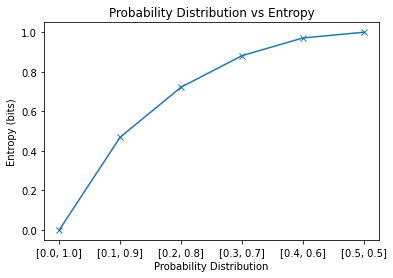

In [24]:
# compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot

# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])

# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='x')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

As expected, we can see that as the distribution of events changes from skewed to balanced, the entropy increases from minimal to maximum values.

That is, if the average event drawn from a probability distribution is not surprising we get a lower entropy, whereas if it is surprising, we get a larger entropy.

We can see that the transition is not linear, that it is super linear. We can also see that this curve is symmetrical if we continued the transition to [0.6, 0.4] and onward to [1.0, 0.0] for the two events, forming an inverted parabola-shape.

Note we had to add a tiny value to the probability when calculating the entropy to avoid calculating the log of a zero value, which would result in an infinity on not a number.

Calculating the entropy for a random variable provides the basis for other measures such as mutual information (information gain).

Entropy also provides the basis for calculating the difference between two probability distributions with cross-entropy and the KL-divergence.